# Task correlation

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import gdown
import seaborn as sns

from scipy import stats

In [12]:

file_id = '1yB5qSBOLl96Y563nIewKOU8RN_gsY3dO'  # Make sure it's a string
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'data.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1yB5qSBOLl96Y563nIewKOU8RN_gsY3dO
To: c:\Users\ncc7888\Desktop\AI_engineering_Tasks\Tasks_Assignments\Mathematics_Tasks\week_3\data.csv
100%|██████████| 52.0k/52.0k [00:00<00:00, 229kB/s]


'data.csv'

In [6]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [4]:
from scipy import stats

In [7]:
df['food_category'].unique()

array(['pork', 'poultry', 'beef', 'lamb_goat', 'fish', 'eggs', 'dairy',
       'wheat', 'rice', 'soybeans', 'nuts'], dtype=object)

In [15]:
df['country'].unique()

array(['Argentina', 'Australia', 'Albania', 'Iceland', 'New Zealand',
       'USA', 'Uruguay', 'Luxembourg', 'Brazil', 'Kazakhstan', 'Sweden',
       'Bermuda', 'Denmark', 'Finland', 'Ireland', 'Greece', 'France',
       'Canada', 'Norway', 'Hong Kong SAR. China', 'French Polynesia',
       'Israel', 'Switzerland', 'Netherlands', 'Kuwait', 'United Kingdom',
       'Austria', 'Oman', 'Italy', 'Bahamas', 'Portugal', 'Malta',
       'Armenia', 'Slovenia', 'Chile', 'Venezuela', 'Belgium', 'Germany',
       'Russia', 'Croatia', 'Belarus', 'Spain', 'Paraguay',
       'New Caledonia', 'South Africa', 'Barbados', 'Lithuania', 'Turkey',
       'Estonia', 'Mexico', 'Costa Rica', 'Bolivia', 'Ecuador', 'Panama',
       'Czech Republic', 'Romania', 'Colombia', 'Maldives', 'Cyprus',
       'Serbia', 'United Arab Emirates', 'Algeria', 'Ukraine', 'Pakistan',
       'Swaziland', 'Latvia', 'Bosnia and Herzegovina', 'Fiji',
       'South Korea', 'Poland', 'Saudi Arabia', 'Botswana', 'Macedonia',
       '

In [9]:
# in need to first get the table for the beef consumptions in the two countries 

beefconArg = df[(df['country']=='Argentina') & (df['food_category']=='beef')]
beefconArg

,Unnamed: 0,country,food_category,consumption,co2_emission
2,3,Argentina,beef,55.48,1712.0


In [12]:
argbeefconsmean = beefconArg['consumption'].mean()
print('The mean beef consumption in Argentina is: ',argbeefconsmean)

The mean beef consumption in Argentina is:  55.48


In [14]:
# The values for beef are not enough so i need to simulatmoreusing a standard deviation of 5

simulated_argbeeef = np.random.normal(loc=argbeefconsmean,scale=5,size=30)
simulated_argbeeef

array([45.60775332, 55.36407472, 67.58168251, 53.22441308, 56.37894646,
       53.06166636, 53.83574322, 58.69774308, 56.85702907, 55.29279431,
       55.25782555, 52.90999919, 47.63646102, 60.48808837, 58.35910717,
       46.09329893, 60.66122153, 56.07639329, 62.77405139, 60.26410615,
       51.52383907, 62.42869735, 56.79795195, 48.8250272 , 51.06440015,
       56.30340614, 61.80904207, 50.59915454, 47.43346041, 47.76784412])

In [16]:
# in need to first get the table for the beef consumptions in the two countries 

beefconbag = df[(df['country']=='Bangladesh') & (df['food_category']=='beef')]
beefconbag

,Unnamed: 0,country,food_category,consumption,co2_emission
1421,1422,Bangladesh,beef,1.28,39.5


In [ ]:
bagbeefconsmean = beefconbag['consumption'].mean()
print('The mean beef consumption in bangladesh is: ',bagbeefconsmean)


The mean beef consumption in bangladesh is:  1.28
standard deviation is :  nan


In [38]:
# The values for beef are not enough so i need to simulate more using a standard deviation of 5

simulated_bagbeeef = np.random.normal(loc=bagbeefconsmean,scale=5,size=30)
simulated_bagbeeef=np.absolute(simulated_bagbeeef)

Is the beef consumption in Argentina significantly different from that in Bangladesh?

H₀: Mean beef consumption (Argentina) = Mean beef consumption (Bangladesh)

H₁: Mean beef consumption (Argentina) ≠ Mean beef consumption (Bangladesh)

In [40]:
corr,p_val = stats.pearsonr(simulated_argbeeef,simulated_bagbeeef)
print('correlation',corr)
print('pvalue',p_val)

correlation 0.03975990715415372
pvalue 0.8347584335377984


since the correlation is 0.03 it means that it the districution of comsumption for argentina and bangkadesh has very weak corellation

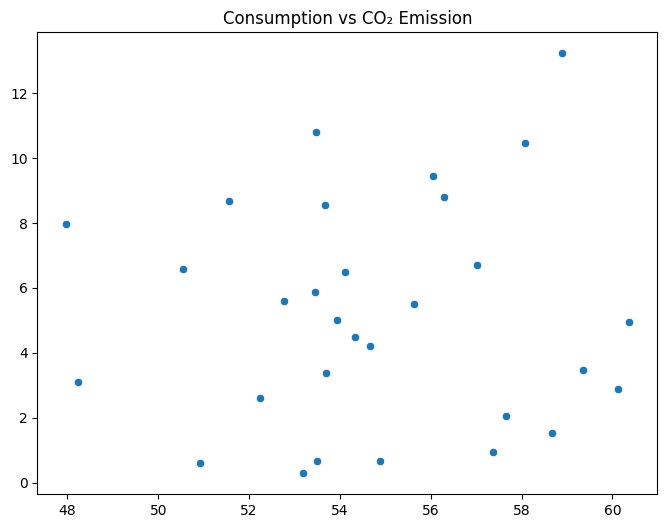

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=simulated_argbeeef,y=simulated_bagbeeef)
plt.title("Consumption vs CO₂ Emission")
plt.show()